<a href="https://colab.research.google.com/github/an0407/ML_Projects/blob/main/Titanic_Survival_Prediction/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC SURVIVAL PREDICTION**


**To predict whether a certain passenger will survive the Titanic Disaster or not based on a number of features like age, gender, ticket fare, ticket class etc...**
<br><br>

# PRIMARY STEPS

**IMPORTING BASIC LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

**LOADING THE DATASET**

In [ ]:
df = pd.read_csv('Titanic_train.csv')
# test = pd.read_csv('Titanic_test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA**

**Shape of Data**

In [ ]:
df.shape

(891, 12)

<br>

**Basic Data Description**

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Unique values in each column**

In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


<br>

**Correlation Heatmap**

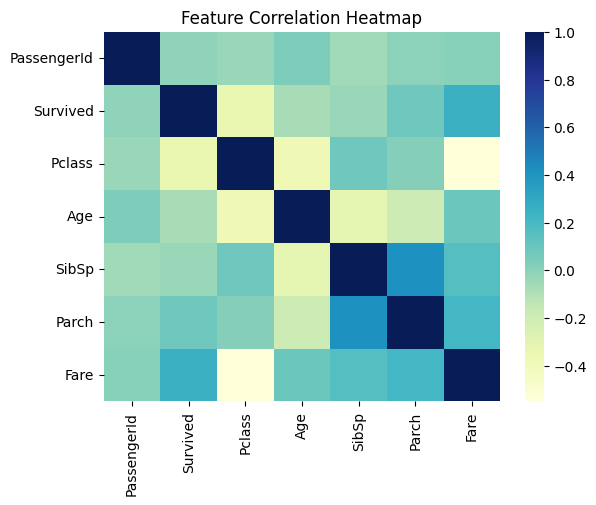

In [ ]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

**INSIGHT:** Positive Correlation Between Fare price and survival, that is: more the people pay for their ticket, higher chance of survival

**INSIGHT:** Negative correlation between pclass and survival, people in 1st class have highest survival rate and people in 3rd class have the lowest!

**INSIGHT:** More Family members means more chance of survival

<br>

**Basic Data Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 'Age' is a numerical column with missing values and 'Embarked" is a categorical column with missing values
- cabin is not an important feature that contributes towards target anyways which can be dropped later.
- So there are essentially just 1 numerical and 1 categorical column with missing values

# DATA PREPROCESSING

**Handling Missing Values**

In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy = 'mean')
df[["Age"]] = num_imputer.fit_transform(df[["Age"]])

cat_imputer = SimpleImputer(strategy = 'most_frequent')
df[["Embarked"]] = cat_imputer.fit_transform(df[["Embarked"]])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Drop column 'Cabin'**

In [ ]:
df = df.drop(columns=['Cabin'], errors='ignore')
df.shape

(891, 11)

**Splitting Data into Train and Test Set**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit( n_splits = 1, test_size = 0.2)

for i,j in split.split(df, df["Survived"]):
  strat_train_set = df.loc[i]
  strat_test_set = df.loc[j]

<Axes: >

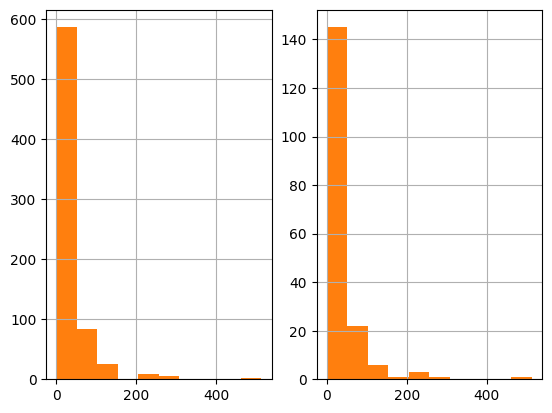

In [ ]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Fare'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Fare'].hist()

**Scaling Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int','float']).columns.drop('Survived', errors='ignore')
scaler = StandardScaler()
strat_train_set[num_cols] = scaler.fit_transform(strat_train_set[num_cols])
strat_test_set[num_cols] = scaler.fit_transform(strat_test_set[num_cols])

<br>

**Encoding Categorical Columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for i in cat_cols:
  strat_train_set[i] = encoder.fit_transform(strat_train_set[i])
  strat_test_set[i] = encoder.fit_transform(strat_test_set[i])

<br>

**Split Training set into features and target**

In [ ]:
X_train = strat_train_set.drop(['Survived'], axis=1)
y_train = strat_train_set['Survived']

# **MODEL SELECTION**

**Hyperparameter Tuning for Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500],
     "max_depth": [None, 5, 10],
     "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

<br>  **Best parameters**

In [ ]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(min_samples_split=3, n_estimators=200)

<br>  **Splitting test set into features and target**

In [ ]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

<br> **Fitting the best parameter model on the test set**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = best_rfc.predict(X_test)

print("accuracy:", accuracy_score(y_test, y_pred)*100,"%")
print("\n Classification Report \n", classification_report(y_test, y_pred))

accuracy: 80.44692737430168 %

 Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.71      0.84      0.77        69

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.80      0.81       179

